# Import  libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import zipfile
import json



In [2]:
zip_path = r'C:\Users\USER\Desktop\Courses-Sapienza\ADM ( algorithm method and datamining )\note and homework\assigment2\archive.zip'
json_path1 = 'books.json/books.json'
json_path2 = 'authors.json/authors.json'

json_path3 = 'list.json/list.json'

# reading data from a Zip file

In [3]:

l = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:   
    with zip_ref.open(json_path2, 'r') as file:
        for line in file:
            # Process each line (which represents a JSON object)
            data = json.loads(line)
            l.append(data)
            
            if len(l) > 100000:
                break

# Create DataFrame from the entire list of JSON data
df_author = pd.DataFrame(l)


In [145]:

l = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:   
    with zip_ref.open(json_path1, 'r') as file:
        for line in file:
            # Process each line (which represents a JSON object)
            data = json.loads(line)
            l.append(data)
            
            if len(l) > 100000:
                break

# Create DataFrame from the entire list of JSON data
df_book = pd.DataFrame(l)

In [8]:
df_book.head()

,id,title,authors,author_name,author_id,work_id,isbn,isbn13,asin,language,...,format,edition_information,image_url,publisher,num_pages,series_id,series_name,series_position,shelves,description
0,2,Harry Potter and the Order of the Phoenix (Har...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2809203,0439358078,9780439358071,,eng,...,Paperback,US Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,870,45175,Harry Potter,5,"[{'name': 'to-read', 'count': 324191}, {'name'...",There is a door at the end of a silent corrido...
1,3,Harry Potter and the Sorcerer's Stone (Harry P...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,4640799,,,,eng,...,Hardcover,Library Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc,309,45175,Harry Potter,1,"[{'name': 'fantasy', 'count': 63540}, {'name':...",Harry Potter's life is miserable. His parents ...
2,4,Harry Potter and the Chamber of Secrets (Harry...,NaN,J.K. Rowling,1077326,6231171,0439554896,9780439554893,,eng,...,Hardcover,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,352,45175,Harry Potter,2,"[{'name': 'to-read', 'count': 282341}, {'name'...",The Dursleys were so mean and hideous that sum...
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,2402163,043965548X,9780439655484,,eng,...,Mass Market Paperback,,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic Inc.,435,45175,Harry Potter,3,"[{'name': 'to-read', 'count': 292815}, {'name'...","For twelve long years, the dread fortress of A..."
4,6,Harry Potter and the Goblet of Fire (Harry Pot...,"[{'id': '1077326', 'name': 'J.K. Rowling', 'ro...",J.K. Rowling,1077326,3046572,,,,eng,...,Paperback,First Scholastic Trade Paperback Edition,https://i.gr-assets.com/images/S/compressed.ph...,Scholastic,734,45175,Harry Potter,4,"[{'name': 'to-read', 'count': 287086}, {'name'...",Harry Potter is midway through his training as...


In [9]:
df_book.columns


Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
       'series_position', 'shelves', 'description'],
      dtype='object')

In [10]:
df_author.columns

Index(['ratings_count', 'average_rating', 'text_reviews_count', 'work_ids',
       'book_ids', 'works_count', 'id', 'name', 'gender', 'image_url', 'about',
       'fans_count'],
      dtype='object')

# Rating dist of Authors

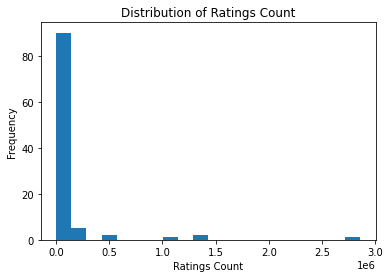

In [11]:
plt.hist(df_author['ratings_count'], bins=20)
plt.title('Distribution of Ratings Count')
plt.xlabel('Ratings Count')
plt.ylabel('Frequency')
plt.show()

# average rating box_plot Authors

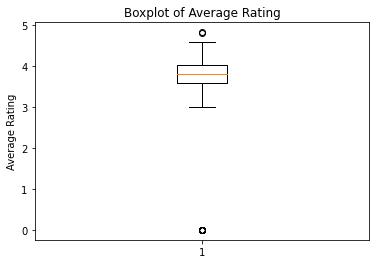

In [12]:
plt.boxplot(df_author['average_rating'])
plt.title('Boxplot of Average Rating')
plt.ylabel('Average Rating')
plt.show()


# Text Review by gender

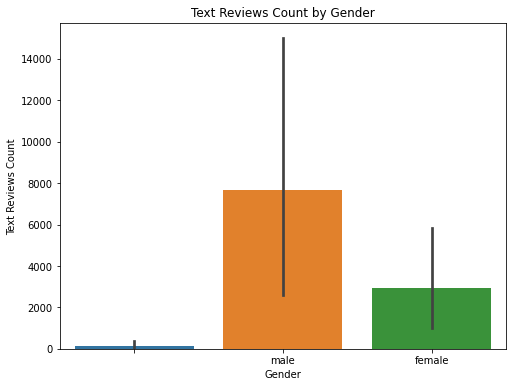

In [13]:

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='text_reviews_count', data=df_author)
plt.title('Text Reviews Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Text Reviews Count')
plt.show()

# Number of Fans of each author by Gender 

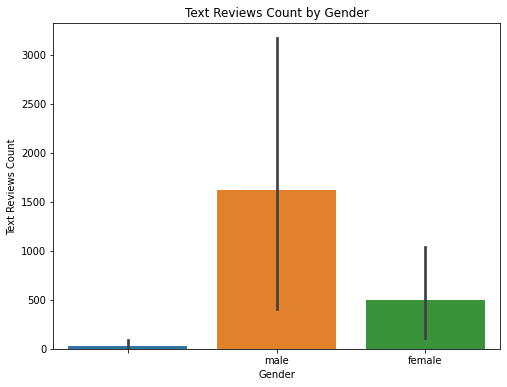

In [14]:

plt.figure(figsize=(8, 6))
sns.barplot(x='gender', y='fans_count', data=df_author)
plt.title('Text Reviews Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Text Reviews Count')
plt.show()

# Relationship Between textreview count and rating count

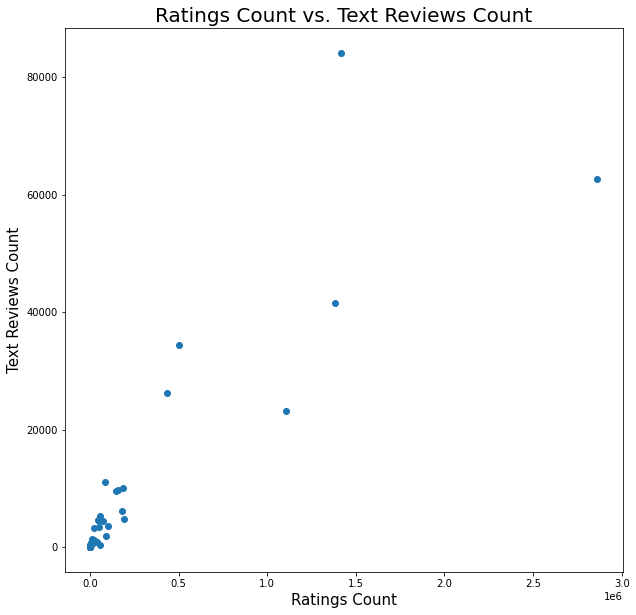

In [15]:
plt.figure(figsize = (10, 10))

plt.scatter(df_author['ratings_count'], df_author['text_reviews_count'])
plt.title('Ratings Count vs. Text Reviews Count' , fontdict = {'size' : 20})
plt.xlabel('Ratings Count' , fontdict = {'size' : 15})
plt.ylabel('Text Reviews Count' , fontdict = {'size' : 15})
plt.show()

# Hist of number of books published by one authors

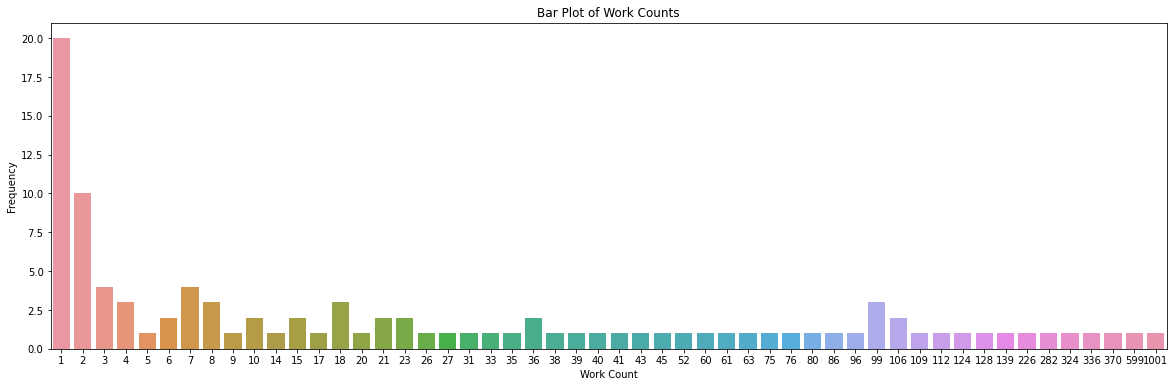

In [16]:
plt.figure(figsize=(20, 6))
work_counts = df_author['works_count'].value_counts().reset_index()
work_counts.columns = ['Work Count', 'Frequency']
sns.barplot(x='Work Count', y='Frequency', data=work_counts)
plt.title('Bar Plot of Work Counts')
plt.xlabel('Work Count')
plt.ylabel('Frequency')
plt.show()

# working with book data

In [17]:
df_book.describe()

,average_rating,ratings_count,text_reviews_count
count,101.000000,1.010000e+02,101.000000
mean,4.037723,3.207753e+05,6378.861386
std,0.374585,9.522260e+05,16178.948973
min,2.850000,4.000000e+00,0.000000
25%,3.800000,2.110000e+02,19.000000
50%,3.930000,2.826000e+03,173.000000
75%,4.360000,9.366300e+04,3324.000000
max,4.790000,7.377351e+06,116930.000000


In [18]:
df_book.columns

Index(['id', 'title', 'authors', 'author_name', 'author_id', 'work_id', 'isbn',
       'isbn13', 'asin', 'language', 'average_rating', 'rating_dist',
       'ratings_count', 'text_reviews_count', 'publication_date',
       'original_publication_date', 'format', 'edition_information',
       'image_url', 'publisher', 'num_pages', 'series_id', 'series_name',
       'series_position', 'shelves', 'description'],
      dtype='object')

In [19]:
df_book.dtypes

id                            object
title                         object
authors                       object
author_name                   object
author_id                     object
work_id                       object
isbn                          object
isbn13                        object
asin                          object
language                      object
average_rating               float64
rating_dist                   object
ratings_count                  int64
text_reviews_count             int64
publication_date              object
original_publication_date     object
format                        object
edition_information           object
image_url                     object
publisher                     object
num_pages                     object
series_id                     object
series_name                   object
series_position               object
shelves                       object
description                   object
dtype: object

### Avg rating box plot with different language

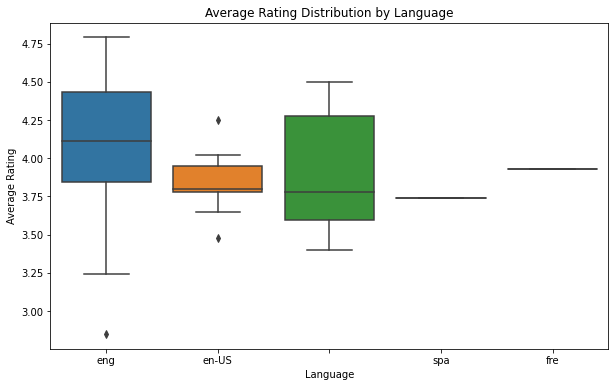

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='language', y='average_rating', data=df_book)
plt.title('Average Rating Distribution by Language')
plt.xlabel('Language')
plt.ylabel('Average Rating')
plt.show()

### number of pages for each format in a barplot

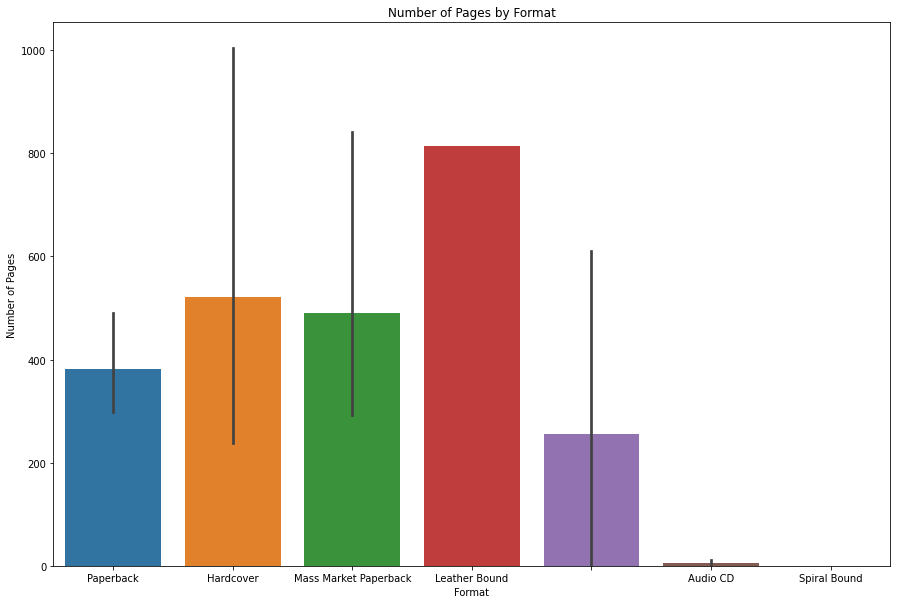

In [21]:
# Convert 'num_pages' to numeric, setting errors='coerce' to convert non-convertible values to NaN
df_book['num_pages'] = pd.to_numeric(df_book['num_pages'], errors='coerce')

# Replace NaN values with a default value (e.g., 0)
df_book['num_pages'].fillna(0, inplace=True)

# Convert the column to integer
df_book['num_pages'] = df_book['num_pages'].astype(int)


plt.figure(figsize = (15, 10))
sns.barplot(x='format', y='num_pages', data=df_book)
plt.title('Number of Pages by Format')
plt.xlabel('Format')
plt.ylabel('Number of Pages')
plt.show()

### Number of Books Published yeach year

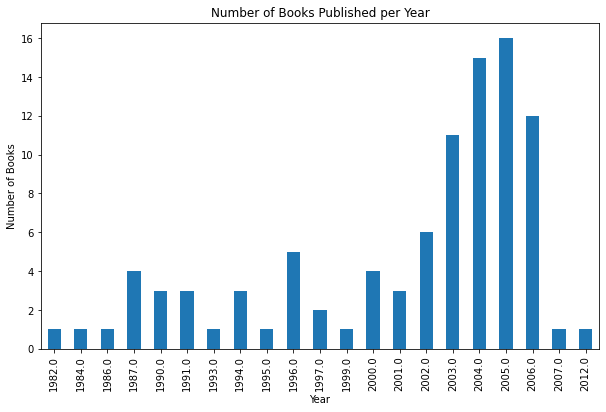

In [22]:
df_book['publication_year'] = pd.to_datetime(df_book['publication_date']).dt.year

plt.figure(figsize=(10, 6))

df_book['publication_year'].value_counts().sort_index().plot(kind='bar')

plt.title('Number of Books Published per Year')
plt.xlabel('Year')
plt.ylabel('Number of Books')
plt.show()

### average rating in each year

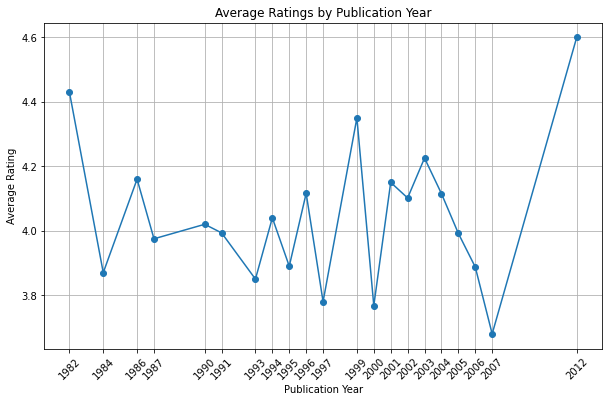

In [23]:

# Convert 'publication_date' to datetime if it's not already in datetime format
df_book['publication_date'] = pd.to_datetime(df_book['publication_date'])

# Extract the year from 'publication_date' and create a new column 'publication_year'
df_book['publication_year'] = df_book['publication_date'].dt.year

# Group by 'publication_year' and calculate the mean of 'average_rating' for each year
avg_rating_by_year = df_book.groupby('publication_year')['average_rating'].mean().reset_index()

# Sort the data by publication year (optional but can be helpful for a clearer visualization)
avg_rating_by_year = avg_rating_by_year.sort_values(by='publication_year')

# Visualization - Line plot of average ratings by publication year
plt.figure(figsize=(10, 6))
plt.plot(avg_rating_by_year['publication_year'], avg_rating_by_year['average_rating'], marker='o')
plt.title('Average Ratings by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Rating')
plt.xticks(avg_rating_by_year['publication_year'], rotation=45)  # Rotate x-labels for better readability
plt.grid(True)
plt.show()


### Average Number of Ages by different years

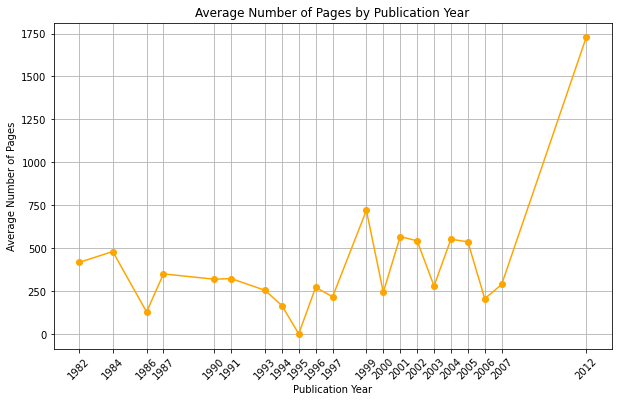

In [24]:


# Convert 'publication_date' to datetime if it's not already in datetime format
df_book['publication_date'] = pd.to_datetime(df_book['publication_date'])

# Extract the year from 'publication_date' and create a new column 'publication_year'
df_book['publication_year'] = df_book['publication_date'].dt.year

# Group by 'publication_year' and calculate the mean of 'num_pages' for each year
avg_pages_by_year = df_book.groupby('publication_year')['num_pages'].mean().reset_index()

# Sort the data by publication year (optional but can be helpful for a clearer visualization)
avg_pages_by_year = avg_pages_by_year.sort_values(by='publication_year')

# Visualization - Line plot of average number of pages by publication year
plt.figure(figsize=(10, 6))
plt.plot(avg_pages_by_year['publication_year'], avg_pages_by_year['num_pages'], marker='o', color='orange')
plt.title('Average Number of Pages by Publication Year')
plt.xlabel('Publication Year')
plt.ylabel('Average Number of Pages')
plt.xticks(avg_pages_by_year['publication_year'], rotation=45)  # Rotate x-labels for better readability
plt.grid(True)
plt.show()


# 2 -  [RQ2] 

## 2.1 - Plot the number of books for each author in descending order.

Text(0, 0.5, 'Numb of books')

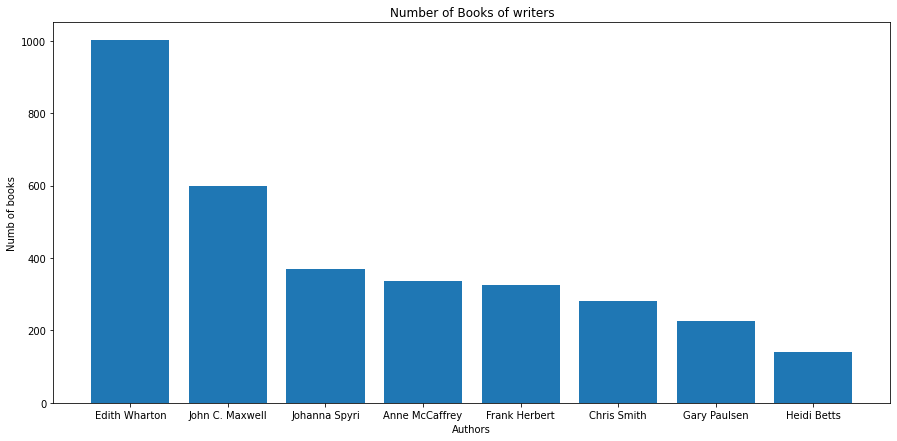

In [25]:
plt.figure(figsize =(15,7))

authors = df_author[['name' , 'works_count']]

authors = authors.sort_values(by = 'works_count' , ascending = False )

authors = authors.iloc[:8 , :]
plt.bar(x = authors['name'] , height = authors['works_count'])

plt.xlabel('Authors')
plt.title('Number of Books of writers')
plt.ylabel('Numb of books')

## 2.2 - Which book has the highest number of reviews?

In [26]:
max_reviews_index = df_book['text_reviews_count'].idxmax()
book_with_highest_reviews = df_book.loc[max_reviews_index]

book_with_highest_reviews['title']

"Harry Potter and the Sorcerer's Stone (Harry Potter, #1)"

## 2.3 - Which are the top ten and ten worst books concerning the average score?

In [27]:
df_book.groupby('title')['average_rating'].mean().reset_index().sort_values(by = 'average_rating' ).head(10)

,title,average_rating
56,The Birthdays,2.85
21,Getting Results with Curriculum Mapping,3.24
51,Ruby Quickly: Ruby and Rails for the Real World,3.40
7,Bill Bryson's African Diary,3.45
13,Chasing Jordan,3.45
33,Hatchet Jobs: Writings on Contemporary Fiction,3.48
82,The Secrets of Frank Herbert's Dune,3.57
44,Love Your Handwriting (Creating Keepsakes),3.58
52,Seven-Year Seduction,3.60
86,The Woodsman and His Hatchet: Eighty Years on ...,3.60


In [28]:
df_book.groupby('title')['average_rating'].mean().reset_index().sort_values(by = 'average_rating' , ascending = False).head(10)

,title,average_rating
25,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...",4.790000
63,"The Harry Potter Collection (Harry Potter, #1-6)",4.730000
26,"Harry Potter Collection (Harry Potter, #1-6)",4.730000
42,J.R.R. Tolkien 4-Book Boxed Set: The Hobbit an...,4.600000
72,The Lord of the Rings,4.586667
76,The Lord of the Rings: Weapons and Warfare,4.580000
30,Harry Potter and the Prisoner of Azkaban (Harr...,4.570000
28,Harry Potter and the Goblet of Fire (Harry Pot...,4.560000
75,The Lord of the Rings: Complete Visual Companion,4.510000
74,The Lord of the Rings Box Set,4.500000


## 2.4 - Explore the different languages in the book’s dataset, providing a proper chart summarizing how these languages are distributed throughout our virtual library.

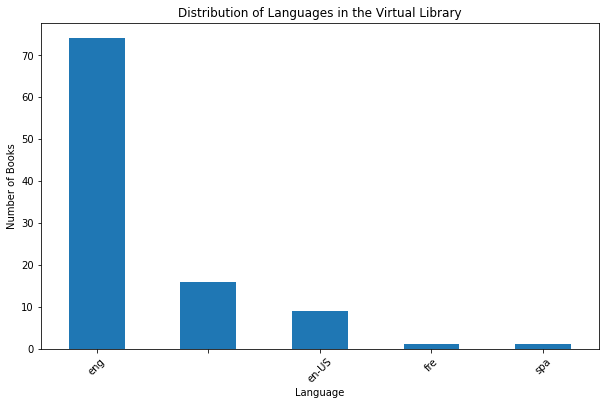

In [29]:
# Count the occurrences of each language
language_counts = df_book['language'].value_counts()

# Plotting the distribution of languages
plt.figure(figsize=(10, 6))
language_counts.plot(kind='bar')
plt.title('Distribution of Languages in the Virtual Library')
plt.xlabel('Language')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)  # Rotate x-labels for better readability
plt.show()

## 2.5 - How many books have more than 250 pages?

In [30]:
len1 = len(list(df_book[df_book['num_pages'] > 250 ]['title'].unique()))

print('The number of books that have more than 250 pages is : ' , len1)

The number of books that have more than 250 pages is :  50


## 2.6 - Plot the distribution of the fans count for the 50 most prolific authors (the ones who have written more books)

In [31]:
fans_dist = df_author.groupby(['name' , 'fans_count'])['works_count'].sum().reset_index().sort_values(by = 'works_count' , ascending = False).head(50)

<Figure size 720x432 with 0 Axes>

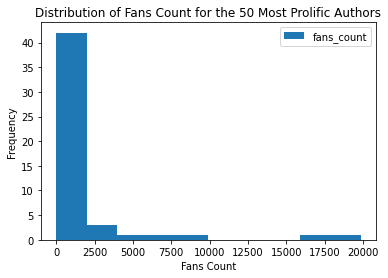

In [32]:
_ = plt.figure(figsize=(10, 6))

fans_dist[['fans_count']].plot(kind = 'hist', bins = 10)

plt.title('Distribution of Fans Count for the 50 Most Prolific Authors')
plt.xlabel('Fans Count')
_ =plt.ylabel('Frequency')


# [RQ3] 

Write a function that takes as input a year and returns as output the following information:

* The number of books published that year.

* The total number of pages written that year.

* The most prolific month of that year.

* The longest book written that year.

In [33]:
def cal_inf(year):
    #1
    data = df_book.groupby('publication_year')['title'].count()
    num_of_books = data[year]
    #----------------------------------
    
    #2
    
    data1 = df_book.groupby('publication_year')['num_pages'].sum()
    total_page = data1[year]
    
    #----------------------------------
    
    #3
    df_book['publication_date'] = df_book['publication_date'].astype(str)
    book_data_year = df_book[df_book['publication_date'].str.startswith(str(year))]
    
    book_data_year['month'] = pd.to_datetime(book_data_year['publication_date']).dt.month_name()
    
    month_counts = book_data_year['month'].value_counts()
    
    most_prolific_month = month_counts.idxmax()
    
    #---------------------------------------------------
    #4
    
    df_book['publication_date'] = df_book['publication_date'].astype(str)
    book_data_year = df_book[df_book['publication_date'].str.startswith(str(year))]
    
    longest_book = book_data_year.groupby('title')['num_pages'].max()
    longest = pd.DataFrame(longest_book).sort_values(by = 'num_pages'  , ascending = False).reset_index()['title'][0]
    
     
    result = pd.DataFrame({
        'Year': year,
        'Num_of_books': [num_of_books],
        'Total_pages': total_page,
        'Most_prolific_month': most_prolific_month,
        'Longest_book_title': [longest]})
    
    #print('num of books is : ' , num_of_books )
    #print('total pages is : ' ,total_page) 
    #print('most profilic month is :', most_prolific_month)
    #print('longest book is :',longest)
    
    return result
    
    

# The code implemented by ChatGPT

In [39]:
import pandas as pd

def books_info_by_year(year, df_book):
    # Filtering books for the given year
    books_year = df_book[df_book['publication_date'].astype(str).str.startswith(str(year))]

    # Number of books published in that year
    num_books = books_year.shape[0]

    # Total number of pages written that year
    total_pages = books_year['num_pages'].sum()

    # Extracting the month from publication date
    books_year.loc[:,'publication_date'] = pd.to_datetime(books_year.loc[:,'publication_date'])
    books_year.loc[:,'month'] = books_year.loc[:,'publication_date'].dt.month_name()
    
    # Most prolific month
    most_prolific_month = books_year['month'].value_counts().idxmax()

    # Longest book written in that year
    longest_book = books_year.loc[books_year['num_pages'].idxmax(), 'title']

    return {
        'Year': year,
        'Num_of_books': num_books,
        'Total_pages': total_pages,
        'Most_prolific_month': most_prolific_month,
        'Longest_book_title': longest_book
    }

# Example usage:
# Replace 'df' with the name of your book dataset
result_2022 = books_info_by_year(2005, df_book)
print(result_2022)


{'Year': 2005, 'Num_of_books': 16, 'Total_pages': 8584, 'Most_prolific_month': 'November', 'Longest_book_title': 'Harry Potter Collection (Harry Potter, #1-6)'}


##### Use this function to build your data frame: the primary key will be a year, and the required information will be the attributes within the row. Finally, show the head and the tail of this new data frame considering the first ten years registered and the last ten years.

In [35]:
import pandas as pd

# List of years
years_list = [i for i in range(1979 , 2015 , 1)]  # Replace these years with the years you want to analyze

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Year', 'Num_of_books', 'Total_pages', 'Most_prolific_month', 'Longest_book_title'])

# Iterate over the list of years and call the function for each year
for year in years_list:
    
    try:
        result = cal_inf(year)
        results_df = results_df.append(result, ignore_index=True)
        
    except:
        pass

# Display the generated DataFrame
results_df

    

<ipython-input-33-328694d51230>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_data_year['month'] = pd.to_datetime(book_data_year['publication_date']).dt.month_name()


,Year,Num_of_books,Total_pages,Most_prolific_month,Longest_book_title
0,1982,1,416,June,"The John McPhee Reader (John McPhee Reader, #1)"
1,1984,1,480,April,"Heretics of Dune (Dune Chronicles, #5)"
2,1986,1,128,April,Heirs of General Practice
3,1987,4,1398,July,Chapterhouse: Dune (Dune #6)
4,1990,3,956,August,"The Changeling (Daughters of England, #15)"
5,1991,3,967,July,Coming Into the Country
6,1993,1,254,March,Neither Here nor There: Travels in Europe
7,1994,3,496,April,Giving Good Weight
8,1995,1,0,July,The Bucaneers
9,1996,5,1358,February,The Ultimate Hitchhiker's Guide (Hitchhiker's ...


#  [RQ4] 

#### 4-1 You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true?

In [ ]:
* You should be sure there are no eponymous (different authors who have precisely the same name) in the author's dataset. Is it true

In [41]:
# Identify eponymous authors
eponymous_authors = df_author[df_author.duplicated('name', keep=False)]

# Display the eponymous authors
eponymous_authors


,ratings_count,average_rating,text_reviews_count,work_ids,book_ids,works_count,id,name,gender,image_url,about,fans_count


#### 4-2 Write a function that, given a list of author_id, outputs a dictionary where each author_id is a key, and the related value is a list with the names of all the books the author has written.

In [50]:
def get_books_by_author(list_of_author_ids):
    books_by_author = {}
    
    
    df_book['author_id'] = df_book['author_id'].astype(int) #did this to input integer author id insted of string type
    for author_id in list_of_author_ids:
        
        # Filter books for a specific author_id
        author_books = df_book[df_book['author_id'] == author_id]['title'].tolist()
        
        # Store book names related to the author_id
        books_by_author[author_id] = author_books
    
    return books_by_author


get_books_by_author([1077326 , 58])

{1077326: ['Harry Potter and the Order of the Phoenix (Harry Potter, #5)',
  "Harry Potter and the Sorcerer's Stone (Harry Potter, #1)",
  'Harry Potter and the Chamber of Secrets (Harry Potter, #2)',
  'Harry Potter and the Prisoner of Azkaban (Harry Potter, #3)',
  'Harry Potter and the Goblet of Fire (Harry Potter, #4)',
  'The Harry Potter Collection (Harry Potter, #1-6)',
  'Harry Potter Boxed Set, Books 1-5 (Harry Potter, #1-5)',
  'Harry Potter Collection (Harry Potter, #1-6)'],
 58: ['God Emperor of Dune (Dune Chronicles, #4)',
  'Dune (Dune Chronicles, #1)',
  'Chapterhouse: Dune (Dune #6)',
  'Dune Messiah (Dune #2)',
  'Heretics of Dune (Dune Chronicles, #5)',
  'The Road to Dune']}

#### 4-3 What is the longest book title among the books of the top 20 authors regarding their average rating? Is it the longest book title overall?

In [114]:
best_authors = df_author.sort_values(by = 'average_rating' , ascending = False).head(20)

list_to_store_len_book = []

for id1 in list(best_authors.id.values):
    id1 = int(id1)
    
    title = df_book[df_book['author_id'] == id1]['title'].tolist()
    
    if len(title) != 0:
        for book_name in title:
            #print(book_name,len(book_name) , id1)
            list_to_store_len_book.append([book_name , len(book_name) , id1])
            
final = sorted(list_to_store_len_book , key =  lambda x : x[1] , reverse = True)

    

In [125]:
final = sorted(list_to_store_len_book , key =  lambda x : x[1] , reverse = True)

print('The longest book name among the to top authors is : \n ' , final[0][0] )
print()
print('the len of the title is : ' , final[0][1])

The longest book name among the to top authors is : 
  The Ultimate Hitchhiker's Guide: Five Complete Novels and One Story (Hitchhiker's Guide to the Galaxy, #1-5)

the len of the title is :  108


### Is it the longest book title overall?

In [138]:
title_len = [(i , len(i)) for i in df_book['title'].tolist() ]

longest_book_title = sorted(title_len , key = lambda x : x[1] , reverse = True)[0][0]

if longest_book_title == final[0][0]:
    print("longest book title among top 20 authors is the same with longest book title overal")
    
else:
    print('they are different from each other')

longest book title among top 20 authors is the same with longest book title overal


#### 4.4 - What is the shortest overall book title in the dataset? If you find something strange, provide a comment on what happened and an alternative answer.

In [159]:
title_len = [(book , len(book)) for book in df_book['title'].tolist() ]

shortest_book_title = sorted(title_len , key = lambda x : x[1] , reverse = False)


"""
it might be because the dataset might contain empty or null book titles. In such cases,
the title with the minimum length might represent an empty or non-informative entry.
An alternative approach to handle this issue would be to clean the dataset, removing or
replacing any null or empty values in the 'title' column, and then reattempting the process 
to find the shortest book title. This cleaning step could involve removing rows
with missing titles or replacing the empty titles with a placeholder to distinguish them from legitimate book titles.
"""
shortest_book_title[0]

('a', 1)